In [15]:
import numpy as np
import matplotlib.pyplot as plt

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

In [16]:
def DeltaSGD(W, X, D):
    alpha = 0.9
    
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
    
        v = np.matmul(W, x)
        y = Sigmoid(v)
        
        e     = d - y
        delta = y * (1-y) * e
        
        dW = alpha * delta * x
        
        W[0][0] = W[0][0] + dW[0]
        W[0][1] = W[0][1] + dW[1]
        W[0][2] = W[0][2] + dW[2]
        
    return W


In [17]:
def DeltaBatch(W, X, D):
    alpha = 0.9
    dWsum = np.zeros(3)

    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]

        v = np.matmul(W, x)
        y = Sigmoid(v)

        e     = d - y
        delta = y * (1-y) * e

        dW = alpha * delta * x
        dWsum = dWsum + dW

    dWavg = dWsum / N

    W[0][0] = W[0][0] + dWavg[0]
    W[0][1] = W[0][1] + dWavg[1]
    W[0][2] = W[0][2] + dWavg[2]

    return W


In [18]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0],
              [0],
              [1],
              [1]])

E1 = np.zeros(1000)
E2 = np.zeros(1000)

W1 = 2*np.random.random((1, 3)) - 1
W2 = np.array(W1)

for epoch in range(1000):
    W1 = DeltaSGD(W1, X, D)
    W2 = DeltaBatch(W2, X, D)
    
    es1 = 0
    es2 = 0
    N   = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        es1 = es1 + (d - y1)**2
        
        v2 = np.matmul(W2, x)
        y2 = Sigmoid(v2)
        es2 = es2 + (d - y2)**2
        
    E1[epoch] = es1/N
    E2[epoch] = es2/N

/var/folders/9l/8fm31dy571v4l5ns_pd0kzjm0000gn/T/ipykernel_93423/1083305367.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E1[epoch] = es1/N
/var/folders/9l/8fm31dy571v4l5ns_pd0kzjm0000gn/T/ipykernel_93423/1083305367.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E2[epoch] = es2/N


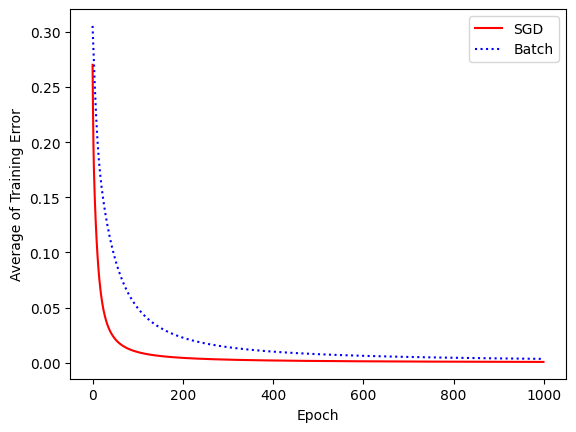

In [19]:
SGD, = plt.plot(E1, 'r')
Batch, = plt.plot(E2, 'b:')
plt.xlabel("Epoch")
plt.ylabel("Average of Training error")
plt.legend([SGD, Batch], ['SGD', 'Batch'])
plt.show()
